In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

<h2>Manual Method</h2>
<p>Couldn't get the webscraping to work on the articles, so I just manually input the data onto this csv file</p>

In [87]:
#Read in the CSV
muscles= pd.read_csv('Resources/Upper_Body_Act_Data.csv')

In [88]:
#Rename the first column and look at the data
muscles=muscles.rename(columns={muscles.columns[0]:"Muscles Used"})
print(muscles)

                      Muscles Used  100 (1)  125 (2)  150 (3)  175 (4)  \
0          Deltoid Maximum Descent     83.0     82.0     84.0     80.0   
1       Deltoid Maximum Descent SD     27.0     28.0     22.0     32.0   
2             Deltoid Mean Descent     43.0     44.0     44.0     41.0   
3          Deltoid Mean Descent SD     15.0     15.0     13.0     15.0   
4         Deltoid Max Time Descent     48.2     52.4     50.1     42.4   
5      Deltoid Max Time Descent SD     15.6     23.8     20.1     17.7   
6       Pectoralis Maximum Descent    136.5    137.5    129.1    143.0   
7    Pectoralis Maximum Descent SD     26.2     33.9     54.5     45.6   
8          Pectoralis Mean Descent     35.0     35.0     34.0     33.0   
9       Pectoralis Mean Descent SD     10.0      9.0     15.0     14.0   
10     Pectoralis Max Time Descent     78.0     75.0     72.0     73.0   
11  Pectoralis Max Time Descent SD     18.0     16.0     29.0     38.0   
12          Tricep Maximum Descent    

In [89]:
#Group the "SD" rows together
sd_only=muscles[muscles['Muscles Used'].str.contains("SD")]
print(sd_only)

#Show the results
print(sd_only)

                      Muscles Used  100 (1)  125 (2)  150 (3)  175 (4)  \
1       Deltoid Maximum Descent SD     27.0     28.0     22.0     32.0   
3          Deltoid Mean Descent SD     15.0     15.0     13.0     15.0   
5      Deltoid Max Time Descent SD     15.6     23.8     20.1     17.7   
7    Pectoralis Maximum Descent SD     26.2     33.9     54.5     45.6   
9       Pectoralis Mean Descent SD     10.0      9.0     15.0     14.0   
11  Pectoralis Max Time Descent SD     18.0     16.0     29.0     38.0   
13       Tricep Maximum Descent SD     13.0     14.0     23.0     17.0   
15          Tricep Mean Descent SD      8.0      7.0      8.0      9.0   
17      Tricep Max Time Descent SD     17.0     18.5     13.1     17.3   
19         Deltoid Maximum Lift SD     33.0     46.0     33.0     35.0   
21            Deltoid Mean Lift SD     11.0     15.0     19.0     17.0   
23    Deltoid Maximum Time Lift SD     15.9     17.2     21.6     24.3   
25      Pectoralis Maximum Lift SD    

In [90]:
# Group the non-SD rows together
non_sd= muscles[~muscles["Muscles Used"].str.contains('SD')]
print(non_sd)

                   Muscles Used  100 (1)  125 (2)  150 (3)  175 (4)  200 (5)  \
0       Deltoid Maximum Descent     83.0     82.0     84.0     80.0     88.0   
2          Deltoid Mean Descent     43.0     44.0     44.0     41.0     45.0   
4      Deltoid Max Time Descent     48.2     52.4     50.1     42.4     48.6   
6    Pectoralis Maximum Descent    136.5    137.5    129.1    143.0    158.5   
8       Pectoralis Mean Descent     35.0     35.0     34.0     33.0     37.0   
10  Pectoralis Max Time Descent     78.0     75.0     72.0     73.0     84.0   
12       Tricep Maximum Descent     57.0     52.0     60.0     61.0     48.0   
14          Tricep Mean Descent     29.0     28.0     29.0     32.0     26.0   
16      Tricep Max Time Descent     79.5     69.7     70.6     69.1     72.7   
18         Deltoid Maximum Lift     94.0     95.0     90.0     87.0     84.0   
20            Deltoid Mean Lift     49.0     47.0     52.0     45.0     51.0   
22    Deltoid Maximum Time Lift     46.8

In [91]:
# Transform this into a dataframe
muscles_df= pd.DataFrame(muscles)

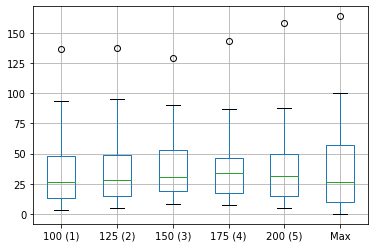

In [92]:
# Create box plot
muscles_df.boxplot(column=["100 (1)", "125 (2)", "150 (3)", "175 (4)", "200 (5)", "Max"])

plt.show()

<p>I forgot this will only show the averages of all the numbers, which are already in the data. So I need to go about this differently. </p>

In [93]:
# Set DF index to "Muscles Used"
muscles_df.set_index('Muscles Used', inplace=True)
print(muscles_df)

                                100 (1)  125 (2)  150 (3)  175 (4)  200 (5)  \
Muscles Used                                                                  
Deltoid Maximum Descent            83.0     82.0     84.0     80.0     88.0   
Deltoid Maximum Descent SD         27.0     28.0     22.0     32.0     33.0   
Deltoid Mean Descent               43.0     44.0     44.0     41.0     45.0   
Deltoid Mean Descent SD            15.0     15.0     13.0     15.0     14.0   
Deltoid Max Time Descent           48.2     52.4     50.1     42.4     48.6   
Deltoid Max Time Descent SD        15.6     23.8     20.1     17.7     18.0   
Pectoralis Maximum Descent        136.5    137.5    129.1    143.0    158.5   
Pectoralis Maximum Descent SD      26.2     33.9     54.5     45.6     52.0   
Pectoralis Mean Descent            35.0     35.0     34.0     33.0     37.0   
Pectoralis Mean Descent SD         10.0      9.0     15.0     14.0     12.0   
Pectoralis Max Time Descent        78.0     75.0    

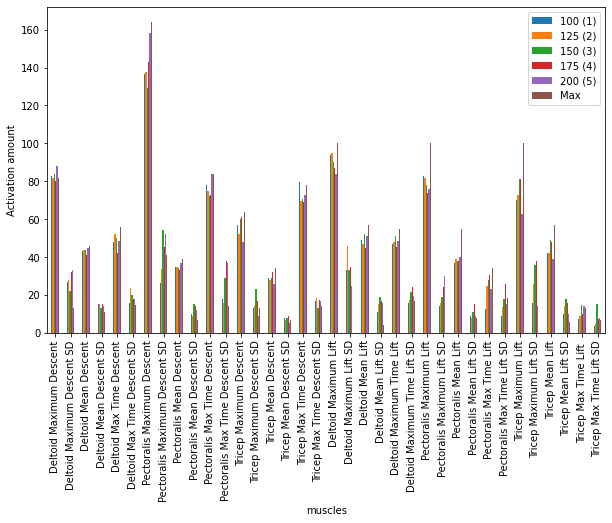

<Figure size 432x288 with 0 Axes>

In [94]:
#Create a bar chart
act_chart=muscles_df.plot(kind='bar', figsize=(10,6))

#Set X and Y labels using class methods
act_chart.set_xlabel("muscles")
act_chart.set_ylabel("Activation amount")

#Show the results
plt.show()
plt.tight_layout()

<p>Forgot this has the standard deviations included</p>

In [95]:
# Create a dataframe for non_sd data
non_sd_df= pd.DataFrame(non_sd)

# Set index to "muscles used"
non_sd_df.set_index("Muscles Used", inplace=True)
print(non_sd_df)

                             100 (1)  125 (2)  150 (3)  175 (4)  200 (5)  \
Muscles Used                                                               
Deltoid Maximum Descent         83.0     82.0     84.0     80.0     88.0   
Deltoid Mean Descent            43.0     44.0     44.0     41.0     45.0   
Deltoid Max Time Descent        48.2     52.4     50.1     42.4     48.6   
Pectoralis Maximum Descent     136.5    137.5    129.1    143.0    158.5   
Pectoralis Mean Descent         35.0     35.0     34.0     33.0     37.0   
Pectoralis Max Time Descent     78.0     75.0     72.0     73.0     84.0   
Tricep Maximum Descent          57.0     52.0     60.0     61.0     48.0   
Tricep Mean Descent             29.0     28.0     29.0     32.0     26.0   
Tricep Max Time Descent         79.5     69.7     70.6     69.1     72.7   
Deltoid Maximum Lift            94.0     95.0     90.0     87.0     84.0   
Deltoid Mean Lift               49.0     47.0     52.0     45.0     51.0   
Deltoid Maxi

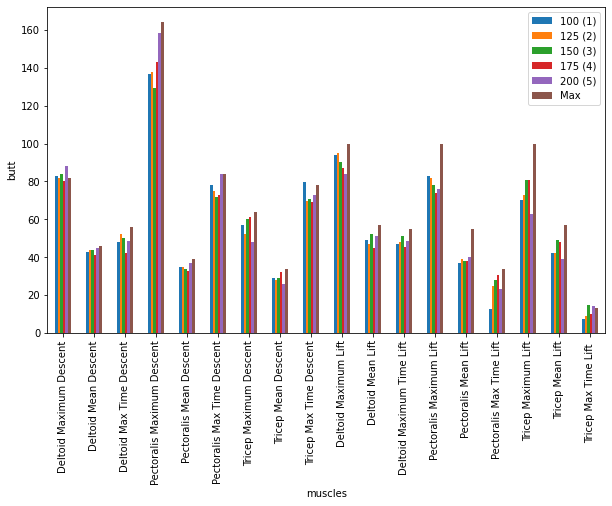

<Figure size 432x288 with 0 Axes>

In [96]:
#Create a bar chart
non_sd_chart=non_sd_df.plot(kind='bar', figsize=(10,6))

#Set X and Y labels using class methods
non_sd_chart.set_xlabel("muscles")
non_sd_chart.set_ylabel("butt")

#Show the results
plt.show()
plt.tight_layout()

In [97]:
print(non_sd_df)

                             100 (1)  125 (2)  150 (3)  175 (4)  200 (5)  \
Muscles Used                                                               
Deltoid Maximum Descent         83.0     82.0     84.0     80.0     88.0   
Deltoid Mean Descent            43.0     44.0     44.0     41.0     45.0   
Deltoid Max Time Descent        48.2     52.4     50.1     42.4     48.6   
Pectoralis Maximum Descent     136.5    137.5    129.1    143.0    158.5   
Pectoralis Mean Descent         35.0     35.0     34.0     33.0     37.0   
Pectoralis Max Time Descent     78.0     75.0     72.0     73.0     84.0   
Tricep Maximum Descent          57.0     52.0     60.0     61.0     48.0   
Tricep Mean Descent             29.0     28.0     29.0     32.0     26.0   
Tricep Max Time Descent         79.5     69.7     70.6     69.1     72.7   
Deltoid Maximum Lift            94.0     95.0     90.0     87.0     84.0   
Deltoid Mean Lift               49.0     47.0     52.0     45.0     51.0   
Deltoid Maxi

In [102]:
# Remove "Time"
non_sd_df=non_sd_df[~non_sd_df.index.str.contains('Time')]
print(non_sd_df)

                            100 (1)  125 (2)  150 (3)  175 (4)  200 (5)    Max
Muscles Used                                                                  
Deltoid Maximum Descent        83.0     82.0     84.0     80.0     88.0   82.0
Deltoid Mean Descent           43.0     44.0     44.0     41.0     45.0   46.0
Pectoralis Maximum Descent    136.5    137.5    129.1    143.0    158.5  163.9
Pectoralis Mean Descent        35.0     35.0     34.0     33.0     37.0   39.0
Tricep Maximum Descent         57.0     52.0     60.0     61.0     48.0   64.0
Tricep Mean Descent            29.0     28.0     29.0     32.0     26.0   34.0
Deltoid Maximum Lift           94.0     95.0     90.0     87.0     84.0  100.0
Deltoid Mean Lift              49.0     47.0     52.0     45.0     51.0   57.0
Pectoralis Maximum Lift        83.0     82.0     78.0     74.0     76.0  100.0
Pectoralis Mean Lift           37.0     39.0     38.0     38.0     40.0   55.0
Tricep Maximum Lift            70.0     73.0     81.

<p>I'm leaving the cell below to remind myself that the code does not work. The "Muscles Used" column is set as the index, which means the code below won't work. To isolate the "Maximum" in a dataframe where the column you want to sort is the index you have to use the cell below this to extract the correct data.</p>

In [ ]:
# Filter Maximum
# maximum= non_sd_df[non_sd_df["Muscles Used"].str.contains("Maximum")]

# print(maximum)

In [103]:
# Sort all rows for maximum activaiton
sorted_max=non_sd_df[non_sd_df.index.str.contains('Maximum')]
print(sorted_max)

                            100 (1)  125 (2)  150 (3)  175 (4)  200 (5)    Max
Muscles Used                                                                  
Deltoid Maximum Descent        83.0     82.0     84.0     80.0     88.0   82.0
Pectoralis Maximum Descent    136.5    137.5    129.1    143.0    158.5  163.9
Tricep Maximum Descent         57.0     52.0     60.0     61.0     48.0   64.0
Deltoid Maximum Lift           94.0     95.0     90.0     87.0     84.0  100.0
Pectoralis Maximum Lift        83.0     82.0     78.0     74.0     76.0  100.0
Tricep Maximum Lift            70.0     73.0     81.0     81.0     63.0  100.0


In [104]:
# Sort all rows for mean activation
mean= non_sd_df[non_sd_df.index.str.contains('Mean')]
print(mean)

                         100 (1)  125 (2)  150 (3)  175 (4)  200 (5)   Max
Muscles Used                                                              
Deltoid Mean Descent        43.0     44.0     44.0     41.0     45.0  46.0
Pectoralis Mean Descent     35.0     35.0     34.0     33.0     37.0  39.0
Tricep Mean Descent         29.0     28.0     29.0     32.0     26.0  34.0
Deltoid Mean Lift           49.0     47.0     52.0     45.0     51.0  57.0
Pectoralis Mean Lift        37.0     39.0     38.0     38.0     40.0  55.0
Tricep Mean Lift            42.0     42.0     49.0     48.0     39.0  57.0


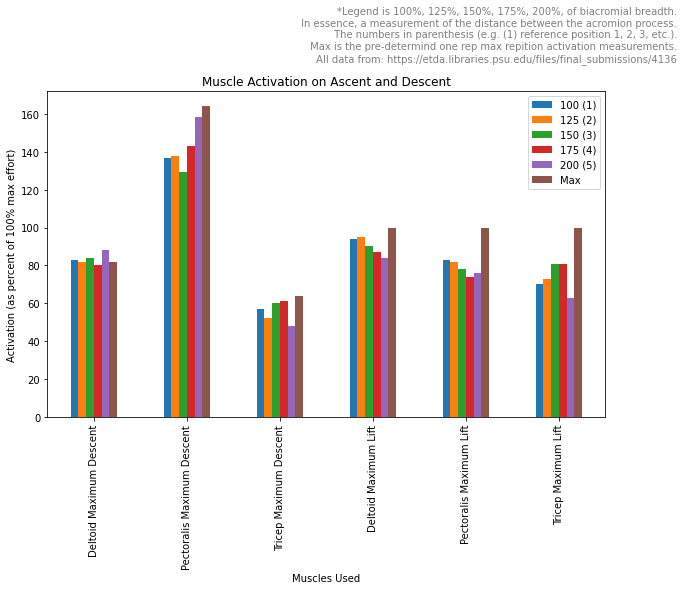

<Figure size 432x288 with 0 Axes>

In [129]:
#Create a bar chart for the max
sort_max_chart=sorted_max.plot(kind='bar', figsize=(10,6))

#Set X and Y labels using class methods
sort_max_chart.set_xlabel("Muscles Used")
sort_max_chart.set_ylabel("Activation (as percent of 100% max effort)")

# Add a footer explaining the legend
# Add footer text
footer_text = "*Legend is 100%, 125%, 150%, 175%, 200%, of biacromial breadth.\n In essence, a measurement of the distance between the acromion process.\n The numbers in parenthesis (e.g. (1) reference position 1, 2, 3, etc.).\n Max is the pre-determind one rep max repition activation measurements.\n All data from: https://etda.libraries.psu.edu/files/final_submissions/4136"
plt.figtext(1, .95, footer_text, ha='right', fontsize=10, color='gray')

#Show the results
plt.title("Muscle Activation on Ascent and Descent")
plt.show()
plt.tight_layout()

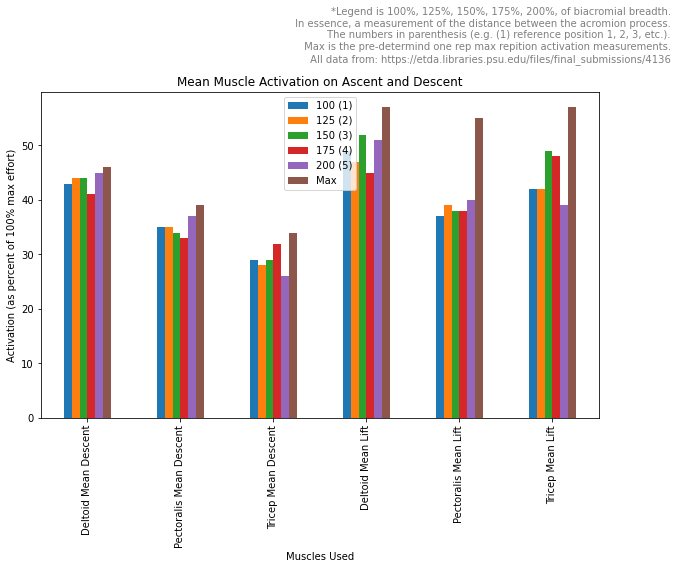

<Figure size 432x288 with 0 Axes>

In [128]:
#Create a bar chart for the mean
mean_chart=mean.plot(kind='bar', figsize=(10,6))

#Set X and Y labels using class methods
mean_chart.set_xlabel("Muscles Used")
mean_chart.set_ylabel("Activation (as percent of 100% max effort)")

# Add a footer explaining the legend
# Add footer text
footer_text = "*Legend is 100%, 125%, 150%, 175%, 200%, of biacromial breadth.\n In essence, a measurement of the distance between the acromion process.\n The numbers in parenthesis (e.g. (1) reference position 1, 2, 3, etc.).\n Max is the pre-determind one rep max repition activation measurements.\n All data from: https://etda.libraries.psu.edu/files/final_submissions/4136"
plt.figtext(1, .95, footer_text, ha='right', fontsize=10, color='gray')

#Show the results
plt.title("Mean Muscle Activation on Ascent and Descent")
plt.show()
plt.tight_layout()